In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvcircuit as pvc

In [3]:
MM927 = pvc.Multi2T(name='MM927',Eg_list = [1.83,1.404,1.049,0.743], Jext=.012, Rser=0.1,area=1)
MM927.j[0].update(Jext=0.01196,n=[1,1.6],J0ratio=[31,4.5])
MM927.j[1].update(Jext=0.01149,n=[1,1.8],J0ratio=[17,42],beta=14.3)
MM927.j[2].update(Jext=0.01135,n=[1,1.4],J0ratio=[51,14],beta=8.6)
MM927.j[3].update(Jext=0.01228,n=[1,1.5],J0ratio=[173,79],beta=10.5)
MM927.j[3].RBB_dict={'method':'JFG', 'mrb':43., 'J0rb':0.3, 'Vrb':0.}

In [4]:
MM927

MM927: <tandem.Multi2T class>
T = 25.0 C, Rser= 0.1 Ω cm2

j[0]: <tandem.Junction class>
 Eg = 1.83 eV, TC = 25.0 C, Jext = 12.0 mA/cm2
 Gsh = 0 S, Rser = 0 Ω cm2, area = 1 cm2
 pn = -1, beta = 15, gamma = 0, JLC = 0.0
     n    J0ratio       J0    
    db       1      1.633e-28 
   1.00    31.00    5.064e-27 
   1.60     4.50    1.450e-18 

j[1]: <tandem.Junction class>
 Eg = 1.40 eV, TC = 25.0 C, Jext = 11.5 mA/cm2
 Gsh = 0 S, Rser = 0 Ω cm2, area = 1 cm2
 pn = -1, beta = 14.3, gamma = 0, JLC = 0.0
     n    J0ratio       J0    
    db       1      1.540e-21 
   1.00    17.00    2.618e-20 
   1.80    42.00    5.339e-12 

j[2]: <tandem.Junction class>
 Eg = 1.05 eV, TC = 25.0 C, Jext = 11.4 mA/cm2
 Gsh = 0 S, Rser = 0 Ω cm2, area = 1 cm2
 pn = -1, beta = 8.6, gamma = 0, JLC = 0.0
     n    J0ratio       J0    
    db       1      8.719e-16 
   1.00    51.00    4.447e-14 
   1.40    14.00    3.405e-11 

j[3]: <tandem.Junction class>
 Eg = 0.74 eV, TC = 25.0 C, Jext = 12.3 mA/cm2
 Gsh =

 0.4678 s
 1.8479 s


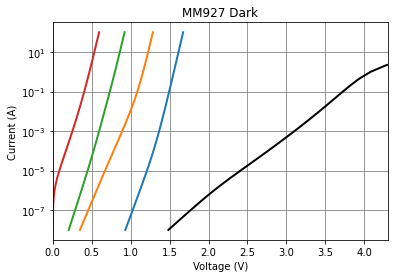

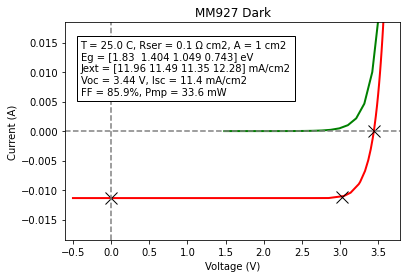

In [5]:
dfig, lfig, dax, lax = MM927.plot()